In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/amit_/Downloads/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
import numpy as np

# Dropping target variable for clustering purposes
data_features = data.drop(columns=['NObeyesdad'])

# Encoding categorical features
categorical_columns = data_features.select_dtypes(include=['object']).columns
data_encoded = data_features.copy()

# Using LabelEncoder for simplicity
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col, le in label_encoders.items():
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Normalizing the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_encoded)

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=7)  # Assuming 7 clusters based on NObeyesdad unique values
cluster_labels = clustering.fit_predict(data_normalized)

# Converting target variable to numerical for accuracy calculation
label_encoder_target = LabelEncoder()
true_labels = label_encoder_target.fit_transform(data['NObeyesdad'])

# Calculate accuracy
accuracy = accuracy_score(true_labels, cluster_labels)

# Mapping back the clusters to their respective labels for better understanding
cluster_to_label = {i: label_encoder_target.classes_[i] for i in range(7)}

accuracy, cluster_to_label


(0.167693036475604,
 {0: 'Insufficient_Weight',
  1: 'Normal_Weight',
  2: 'Obesity_Type_I',
  3: 'Obesity_Type_II',
  4: 'Obesity_Type_III',
  5: 'Overweight_Level_I',
  6: 'Overweight_Level_II'})

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import PolynomialFeatures

# 1. Dimensionality Reduction using PCA and K-means clustering
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)
accuracy_kmeans = accuracy_score(true_labels, kmeans_labels)

# 2. Improved Feature Engineering with polynomial features and K-means clustering
poly = PolynomialFeatures(degree=2, include_bias=False)
data_poly = poly.fit_transform(data_normalized)
kmeans_poly = KMeans(n_clusters=7, random_state=42)
kmeans_poly_labels = kmeans_poly.fit_predict(data_poly)
accuracy_kmeans_poly = accuracy_score(true_labels, kmeans_poly_labels)

# 3. Using DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_normalized)
dbscan_labels_fixed = np.where(dbscan_labels == -1, 0, dbscan_labels)
accuracy_dbscan = accuracy_score(true_labels, dbscan_labels_fixed)

print("Accuracy with PCA and K-means: ", accuracy_kmeans)
print("Accuracy with polynomial features and K-means: ", accuracy_kmeans_poly)
print("Accuracy with DBSCAN: ", accuracy_dbscan)


C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy with PCA and K-means:  0.19848413074372334
Accuracy with polynomial features and K-means:  0.18853623874940786
Accuracy with DBSCAN:  0.11700615821885363


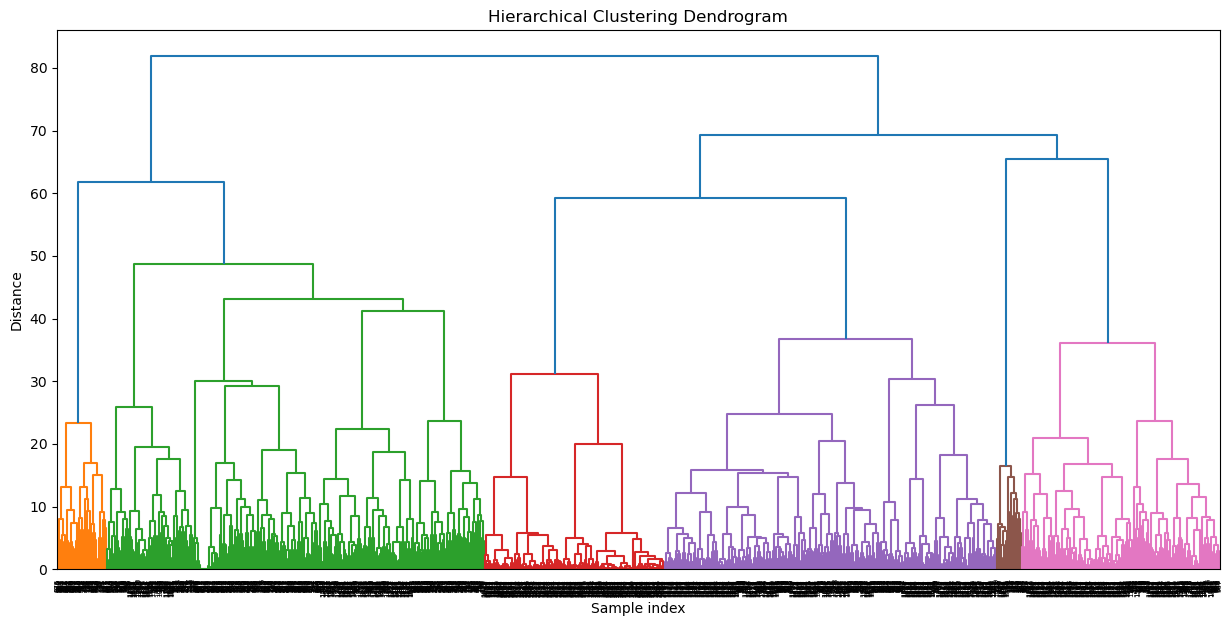

In [3]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Generate the linkage matrix
Z = sch.linkage(data_normalized, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
